In [1]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

%matplotlib inline
sns.set_style('white')

In [2]:
# Read data into a DataFrame.
data = pd.read_excel('Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2013.xls')
data.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,NaN,2.0,7.0,63.0,21.0,39.0,3.0,NaN,NaN,NaN,NaN
1,NaN,Adamsville,4481.0,19.0,1.0,0.0,NaN,7.0,11.0,321.0,58.0,252.0,11.0,NaN,NaN,NaN,
2,NaN,Addison,744.0,1.0,0.0,1.0,NaN,0.0,0.0,25.0,6.0,17.0,2.0,NaN,NaN,NaN,
3,NaN,Alabaster,31170.0,44.0,0.0,2.0,NaN,11.0,31.0,640.0,70.0,544.0,26.0,NaN,NaN,NaN,NaN
4,NaN,Alexander City,14692.0,119.0,2.0,16.0,NaN,12.0,89.0,661.0,121.0,510.0,30.0,NaN,NaN,NaN,NaN


In [3]:
print (data.columns)

Index(['State', 'City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [4]:
# Cleaning up blank columns and changing the columns to short names
data=data.iloc[:, 0:14]
data.rename(columns={'Murder and\nnonnegligent\nmanslaughter': 'Murder'}, inplace=True)
data.rename(columns={'Property\ncrime': 'Property_crime'}, inplace=True)
data.rename(columns={'Rape\n(revised\ndefinition)1': 'Rape_1'}, inplace=True)
data.rename(columns={'Rape\n(legacy\ndefinition)2': 'Rape_2'}, inplace=True)
data.rename(columns={'Larceny-\ntheft': 'Larceny_theft'}, inplace=True)
data.head()

,State,City,Population,Violent crime,Murder,Rape_1,Rape_2,Robbery,Aggravated assault,Property_crime,Burglary,Larceny_theft,Motor vehicle theft,Arson3
0,ALABAMA,Abbeville,2645.0,11.0,1.0,1.0,NaN,2.0,7.0,63.0,21.0,39.0,3.0,NaN
1,NaN,Adamsville,4481.0,19.0,1.0,0.0,NaN,7.0,11.0,321.0,58.0,252.0,11.0,NaN
2,NaN,Addison,744.0,1.0,0.0,1.0,NaN,0.0,0.0,25.0,6.0,17.0,2.0,NaN
3,NaN,Alabaster,31170.0,44.0,0.0,2.0,NaN,11.0,31.0,640.0,70.0,544.0,26.0,NaN
4,NaN,Alexander City,14692.0,119.0,2.0,16.0,NaN,12.0,89.0,661.0,121.0,510.0,30.0,NaN


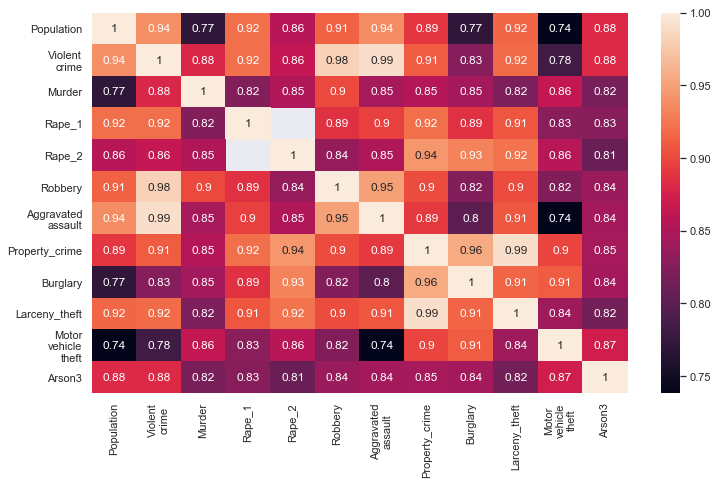

In [5]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data=data.corr(), annot=True)
plt.show()

From the heatmap selected the Burglary, Larceny theft  and Rape since they have the most correlation with the outcome variable i.e property crime.

In [6]:
data=data[['Property_crime', 'Burglary', 'Larceny_theft', 'Rape_1', 'Rape_2']]

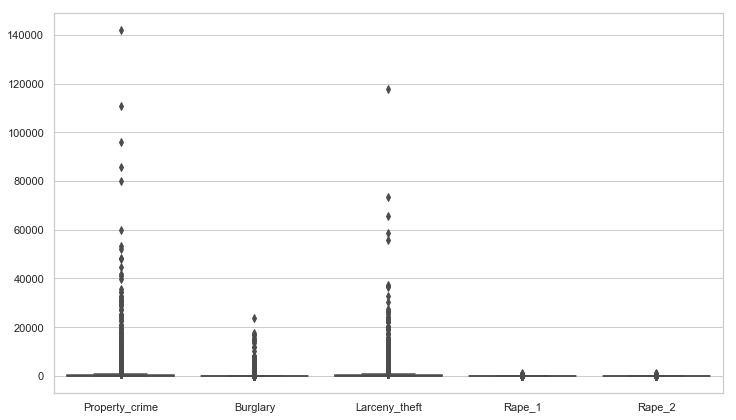

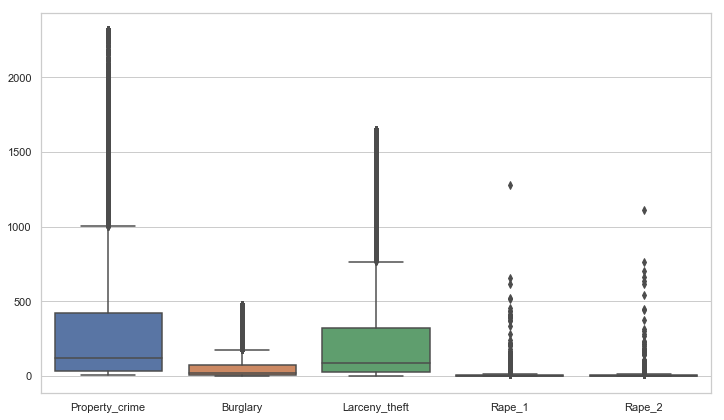

In [7]:
# For fixing the multivariate non-normality of the errors...we can remove the outliers 
#or winsorize them
# Box plot before winsorizing
sns.set_style("whitegrid")
g=sns.boxplot(data=data)
plt.show()

for columns in data:
    stats.mstats.winsorize(data[columns], inplace=True, limits = [0.05, 0.05])

# Box plot after winsorizing

sns.set_style("whitegrid")
g=sns.boxplot(data=data)
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 5 columns):
Property_crime    9302 non-null float64
Burglary          9302 non-null float64
Larceny_theft     9302 non-null float64
Rape_1            5431 non-null float64
Rape_2            3859 non-null float64
dtypes: float64(5)
memory usage: 363.4 KB


In [9]:
# Data imputation using highly correlated another variable
data.Rape_1 = np.where(data.Rape_1.isnull(), data.Rape_2, data.Rape_1)

In [10]:
data[['Rape_1', 'Rape_2']]

,Rape_1,Rape_2
0,1.0,NaN
1,0.0,NaN
2,1.0,NaN
3,2.0,NaN
4,16.0,NaN
5,0.0,NaN
6,4.0,NaN
7,39.0,NaN
8,5.0,NaN
9,0.0,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 5 columns):
Property_crime    9302 non-null float64
Burglary          9302 non-null float64
Larceny_theft     9302 non-null float64
Rape_1            9290 non-null float64
Rape_2            3859 non-null float64
dtypes: float64(5)
memory usage: 363.4 KB


In [12]:
data=data[['Property_crime', 'Burglary', 'Larceny_theft', 'Rape_1']]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 4 columns):
Property_crime    9302 non-null float64
Burglary          9302 non-null float64
Larceny_theft     9302 non-null float64
Rape_1            9290 non-null float64
dtypes: float64(4)
memory usage: 290.8 KB


C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nagad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\nagad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


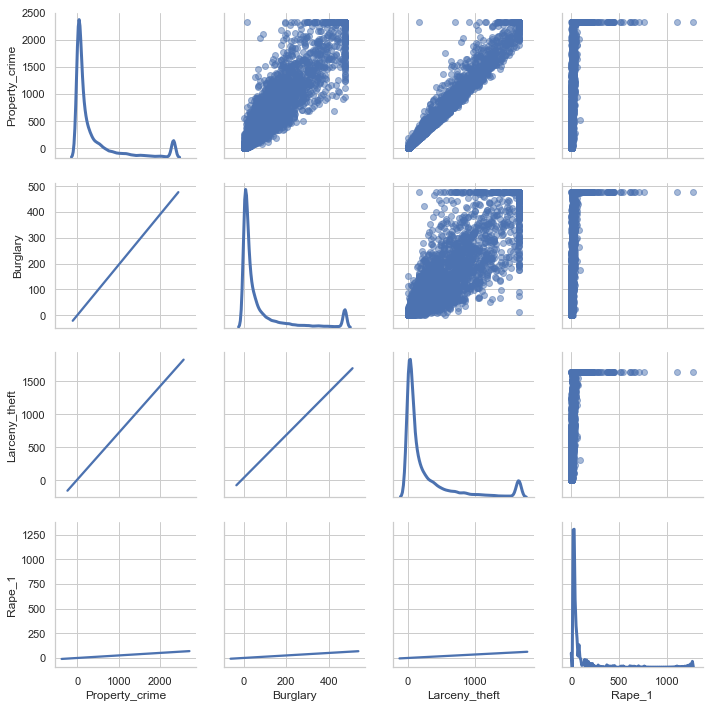

In [14]:
g = sns.PairGrid(data, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [15]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9290 entries, 0 to 9291
Data columns (total 4 columns):
Property_crime    9290 non-null float64
Burglary          9290 non-null float64
Larceny_theft     9290 non-null float64
Rape_1            9290 non-null float64
dtypes: float64(4)
memory usage: 362.9 KB


The coefficents
 Intercept       -6.483987
Larceny_theft    1.015867
Burglary         1.395562
Rape_1          -0.036053
dtype: float64

The pValues
 Intercept        1.325213e-35
Larceny_theft    0.000000e+00
Burglary         0.000000e+00
Rape_1           8.540911e-03
dtype: float64

The R2 squared
 0.995117307510803

The confidence intervals
                       0         1
Intercept     -7.500235 -5.467738
Larceny_theft  1.010711  1.021023
Burglary       1.377412  1.413711
Rape_1        -0.062920 -0.009186
[ 62.40556063 330.45703777  19.1230663  ... 125.88217582 109.17149082
  42.02114639]


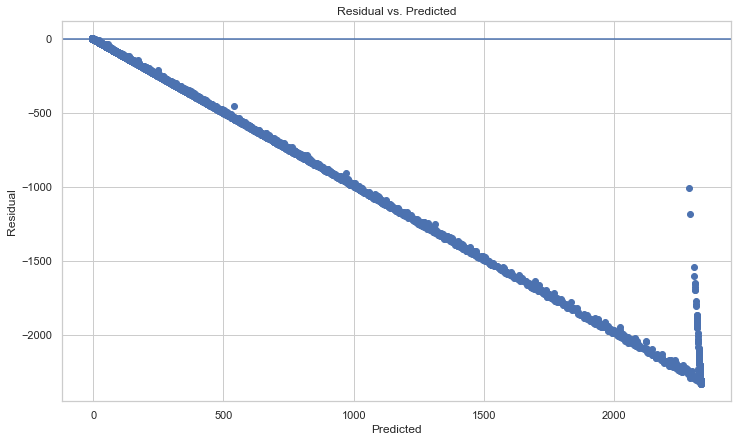

In [16]:
# Linear formula
linear_formula = 'Property_crime ~ Larceny_theft+Burglary+Rape_1'
# Fit the model to our data using the formula.

try:
    lm = smf.ols(formula=linear_formula, data=data)
    results=lm.fit()
except ValueError:
    print ('Value error found')

print ('The coefficents\n', results.params)
print ('\nThe pValues\n',results.pvalues)
print ('\nThe R2 squared\n',results.rsquared)
print ('\nThe confidence intervals\n',results.conf_int())

actual=data['Rape_1']
predicted=results.predict()
residual=actual-predicted
print (predicted)
# Testing if model is predicting well.
plt.scatter(x=predicted, y=residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Property_crime   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.308e+05
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        10:04:11   Log-Likelihood:                -47835.
No. Observations:                9290   AIC:                         9.568e+04
Df Residuals:                    9286   BIC:                         9.571e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.4840      0.518    -12.507      0.000      -7.500      -5.468
Larceny_theft     1.0159      0.003    386.223      0.000       1.011       1.021
Burglary          1.3956      0.009    150.729      0.000       1.377       1.414
Rape_1           -0.0361      0.014     -2.630      0.009      -0.063      -0.009
==============================================================================
Omnibus:                    15555.240   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26295277.836
Skew:                          11.050   Prob(JB):                         0.00
Kurtosis:                     262.699   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#results.predict([63,0],[1,1])

In [19]:
y=data['Property_crime']
X=data[['Burglary', 'Larceny_theft', 'Rape_1']]
regr= linear_model.LinearRegression().fit(X, y)
score=cross_val_score(regr,X=X,y=y, cv=10)
print (score)

[0.98939393 0.99662663 0.99777292 0.9946494  0.99766964 0.9945858
 0.99764039 0.99707045 0.99872529 0.98781937]


In [20]:
test, p = stats.chisquare(score)
# interpreting the chisquare results
alpha = 0.05

print ("The Hypothesis H0: Scores are tight and model is accurate with no overfitting\n(No significant diff)")

if p > alpha:
	print('Scores are tight with mentioned p value (fail to reject H0)    p=', p)
else:
	print('RESULT:\n The scores are not tight and vary a lot (reject H0)   p=', p)

The Hypothesis H0: Scores are tight and model is accurate with no overfitting
(No significant diff)
Scores are tight with mentioned p value (fail to reject H0)    p= 1.0


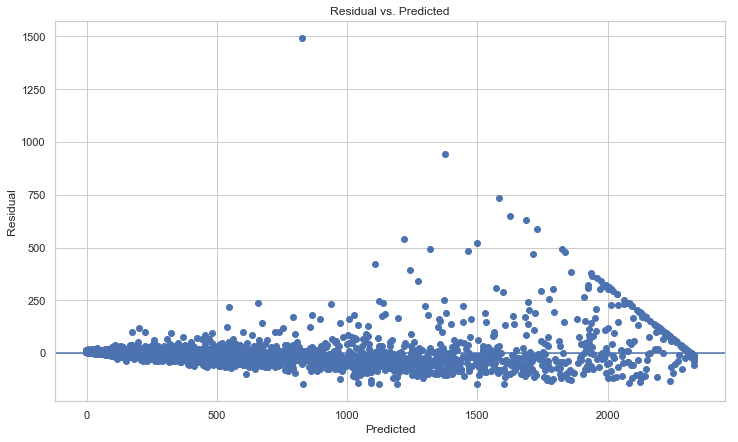

In [21]:
#Checking multivariate normality in the error of the model
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


## Testing the model with new data not seen by model

In [29]:
test_data=pd.read_excel('Test data for FBI-Crime.xls')
test_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [30]:
test_data.rename(columns={'Murder and\nnonnegligent\nmanslaughter': 'Murder'}, inplace=True)
test_data.rename(columns={'Property\ncrime': 'Property_crime'}, inplace=True)
test_data.rename(columns={'Rape\n(revised\ndefinition)1': 'Rape_1'}, inplace=True)
test_data.rename(columns={'Rape\n(legacy\ndefinition)2': 'Rape_2'}, inplace=True)
test_data.rename(columns={'Larceny-\ntheft': 'Larceny_theft'}, inplace=True)
test_data.head()

,City,Population,Violent crime,Murder,Rape_1,Rape_2,Robbery,Aggravated assault,Property_crime,Burglary,Larceny_theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [31]:
test_data=test_data[['Property_crime', 'Burglary', 'Larceny_theft', 'Rape_1', 'Rape_2']]

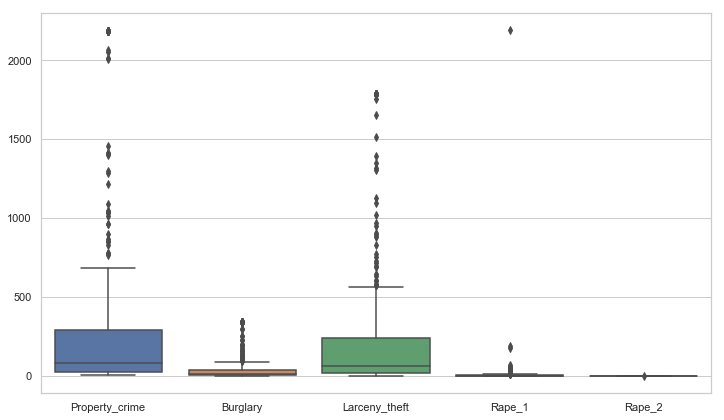

In [32]:
# For fixing the multivariate non-normality of the errors...we can remove the outliers 
#or winsorize them

for columns in test_data:
    stats.mstats.winsorize(test_data[columns], inplace=True, limits = [0.05, 0.05])

# Box plot after winsorizing

sns.set_style("whitegrid")
g=sns.boxplot(data=test_data)
plt.show()

In [33]:
# Data imputation using highly correlated another variable
#and delete remaining missing values.
test_data.Rape_1 = np.where(test_data.Rape_1.isnull(), test_data.Rape_2, test_data.Rape_1)
test_data=test_data[['Property_crime', 'Burglary', 'Larceny_theft', 'Rape_1']]
test_data.dropna(axis=0, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 368
Data columns (total 4 columns):
Property_crime    369 non-null float64
Burglary          369 non-null float64
Larceny_theft     369 non-null float64
Rape_1            369 non-null float64
dtypes: float64(4)
memory usage: 14.4 KB


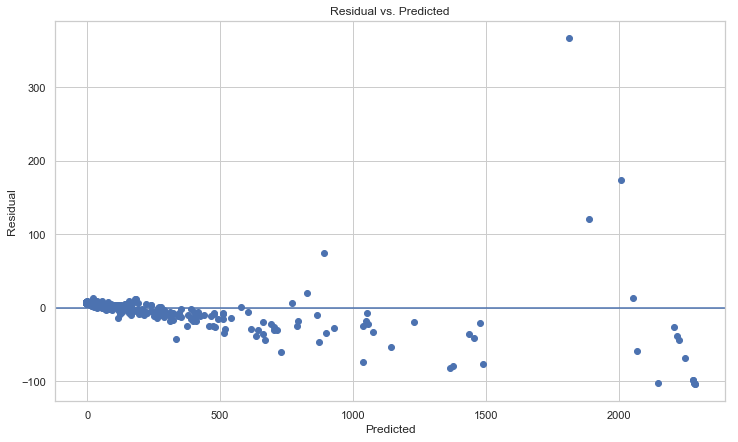

In [36]:
y=test_data['Property_crime']
x=test_data[['Burglary', 'Larceny_theft', 'Rape_1']]

# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = test_data['Property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

#Checking homoscedascity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [37]:
score=cross_val_score(regr,X=x,y=y, cv=10)
print (score)

[0.99954246 0.99911864 0.99909724 0.99721268 0.99894081 0.99811228
 0.86547369 0.99896605 0.99473447 0.98601131]


In [ ]:
#comparing the old model and current model...this model is much better in terms of accuracy of prediction than previous model
#where the accuracy is only around 77%. Here it is around 99%

In [ ]:
#What is the correlation between outcome and one of the predictor i.e larceny_theft
#sns.lmplot(x='Larceny_theft', y='Property_crime', data=data, fit_reg=True)
from scipy import stats
def R2(x, y):
    return (stats.pearsonr(x, y)[0]**2,stats.pearsonr(x, y)[1] )
sns.jointplot(x=data['Larceny_theft'], y=data['Property_crime'], kind="reg", stat_func=R2)
plt.show()

In [ ]:
# rotation by 90 deg
#a=np.array([[-2],[1]])

In [ ]:
#ser_array=np.array([data['Burglary'], [1]])
#test=np.dot(ser_array, a)
#print (type(test))
#data['Burglary']=pd.Series(test)